In [1]:
from PetTracer import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


In [ ]:
# Load model
model = get_model(device)

In [ ]:
data_path = './Sample_data/P001_PET_coronal_116_denoised_adjusted.h5'
tbpet_inference(model, device, data_path, sample_size = 1000, num_timesteps = 3, batch_size = 500)

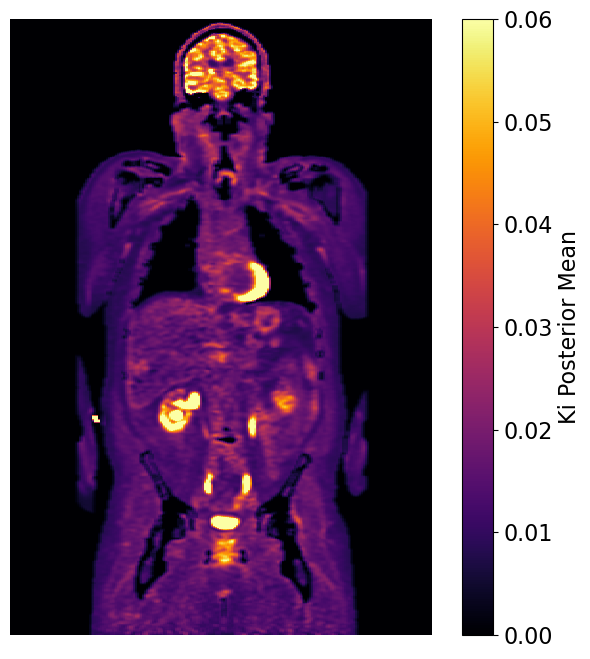

In [2]:
slice_index = 116
mask = np.load("P001_mask.npy")
mask_slice = mask[:,slice_index,:]
spacing = np.array([3.3,3.3,1.645])[[0,2]] # P001
estimates = np.load('Output/tbpet_estimates.npy')
parameter_name = "Ki Posterior Mean"
statistic = estimates[0,:]
parametric_map_interactive(statistic, mask_slice, spacing, parameter_name)